In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


# Reading Data

In [2]:
# Define the path to the Excel file
file_path = r"C:/Users/mosta/OneDrive/Desktop/Ds 2023/Project Data Science 30.09.2024 to 1.11.2024/Churn Analysis Portfolio Project/Prediction_Data.xlsx"


In [3]:
# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

In [4]:
# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [5]:
# Display the first few rows of the fetched data
print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12       None           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal          95.10       6683.40          0.00   
1  Bank Wi

In [6]:
pd.set_option('display.max_columns', None)
data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,Yes,Fiber Optic,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,95.10,6683.40,0.00,0,631.72,7315.12,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,Yes,DSL,No,No,Yes,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,49.15,169.05,0.00,10,122.37,301.42,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,Yes,Fiber Optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Two Year,Yes,Bank Withdrawal,116.05,8297.50,42.57,110,1872.98,10237.91,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,None,Yes,No,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,84.40,5969.30,0.00,0,219.39,6188.69,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,Yes,DSL,Yes,No,No,Yes,Yes,Yes,No,No,Two Year,Yes,Credit Card,72.60,4084.35,0.00,140,332.08,4556.43,Stayed,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,98058-MAH,Female,62,No,Maharashtra,3,21,None,Yes,Yes,No,None,No,No,No,No,No,No,No,No,One Year,No,Bank Withdrawal,24.90,1334.00,0.00,0,144.48,1478.48,Churned,Attitude,Attitude of support person
6003,98098-TAM,Female,73,No,Tamil Nadu,0,5,Deal 1,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,No,Yes,One Year,Yes,Credit Card,-8.00,4174.35,0.00,0,2407.68,6582.03,Stayed,Others,Others
6004,98120-TAM,Male,36,Yes,Tamil Nadu,14,20,None,Yes,Yes,No,None,No,No,No,No,No,No,No,No,One Year,No,Bank Withdrawal,26.20,954.90,0.00,0,1719.55,2674.45,Stayed,Others,Others
6005,98128-JAM,Female,43,Yes,Jammu & Kashmir,0,16,None,Yes,Yes,Yes,Fiber Optic,No,No,Yes,Yes,No,No,No,Yes,One Year,No,Bank Withdrawal,86.75,1410.25,0.00,0,845.07,2255.32,Stayed,Others,Others


In [7]:
data.shape

(6007, 32)

In [8]:
data.info

<bound method DataFrame.info of      Customer_ID  Gender  Age Married            State  Number_of_Referrals  \
0      11098-MAD  Female   30     Yes   Madhya Pradesh                    0   
1      11114-PUN    Male   51      No           Punjab                    5   
2      11167-WES  Female   43     Yes      West Bengal                    3   
3      11179-MAH    Male   35      No      Maharashtra                   10   
4      11180-TAM    Male   75     Yes       Tamil Nadu                   12   
...          ...     ...  ...     ...              ...                  ...   
6002   98058-MAH  Female   62      No      Maharashtra                    3   
6003   98098-TAM  Female   73      No       Tamil Nadu                    0   
6004   98120-TAM    Male   36     Yes       Tamil Nadu                   14   
6005   98128-JAM  Female   43     Yes  Jammu & Kashmir                    0   
6006   98142-UTT  Female   70      No    Uttar Pradesh                    3   

      Tenure_in_Mon

In [9]:
print(data.columns)

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')


In [10]:
data.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,47.289163,7.439820,17.39454,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246021
std,16.805110,4.622369,10.59292,31.067808,2267.481294,8.065520,25.405737,854.858841,2856.181082
min,18.000000,0.000000,1.00000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,3.000000,8.00000,35.950000,539.950000,0.000000,0.000000,107.085000,833.685000
50%,47.000000,7.000000,17.00000,71.100000,1556.850000,0.000000,0.000000,470.220000,2367.150000
75%,60.000000,11.000000,27.00000,90.450000,4013.900000,0.000000,0.000000,1269.840000,5105.685000
max,84.000000,15.000000,36.00000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


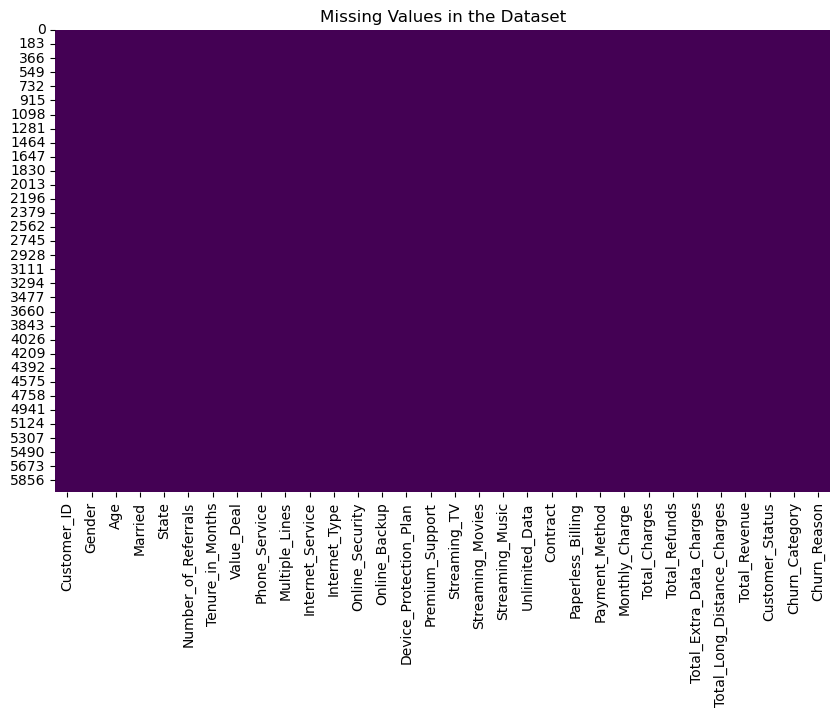

In [11]:
# Visualizing the missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in the Dataset")
plt.show()

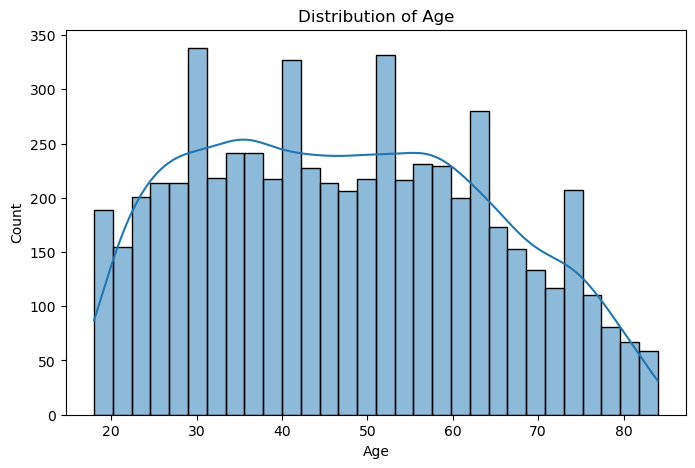

In [12]:
# Visualizing distribution of a specific numeric column (e.g., Age)
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title("Distribution of Age")
plt.show()

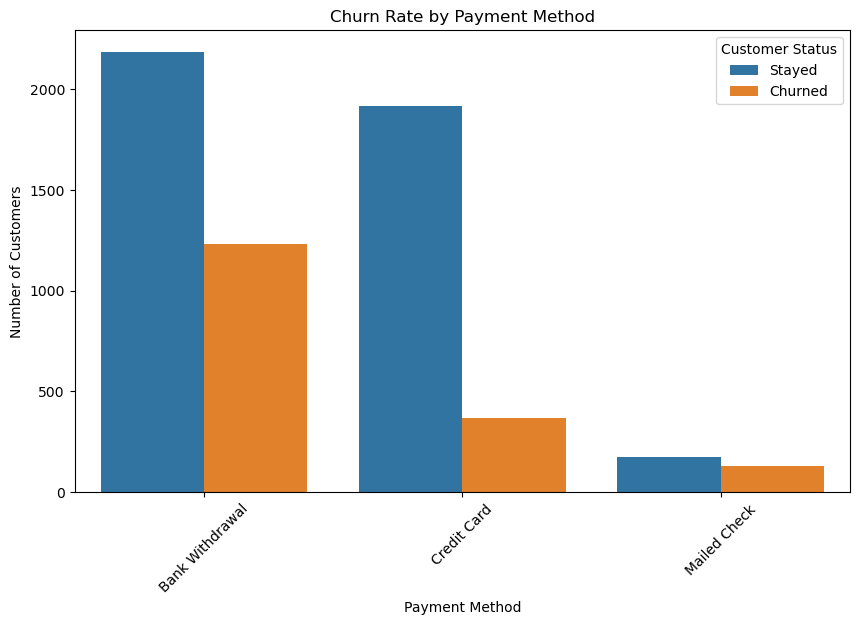

In [13]:
# 7. Churn Rate by Payment Method
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment_Method', hue='Customer_Status', data=data)
plt.title("Churn Rate by Payment Method")
plt.ylabel("Number of Customers")
plt.xlabel("Payment Method")
plt.xticks(rotation=45)
plt.legend(title='Customer Status')
plt.show()

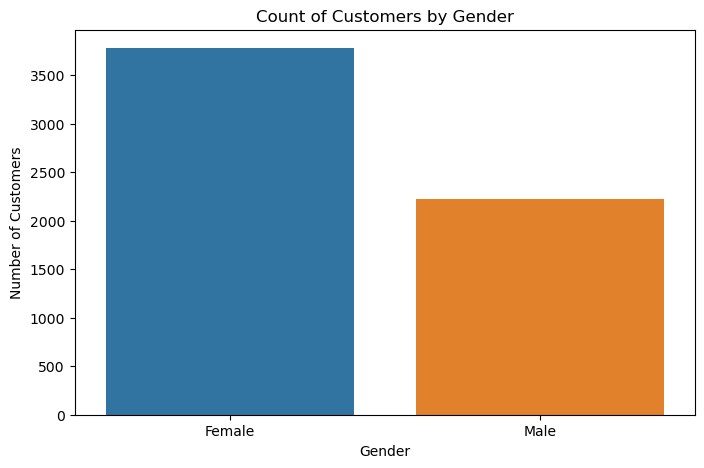

In [14]:
# 1. Count of customers by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=data)
plt.title("Count of Customers by Gender")
plt.ylabel("Number of Customers")
plt.xlabel("Gender")
plt.show()

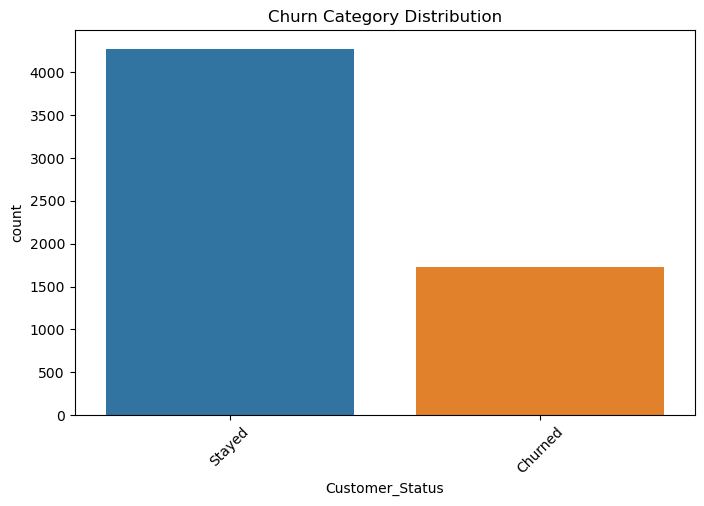

In [15]:
# Visualizing the churn category distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer_Status', data= data)
plt.title("Churn Category Distribution")
plt.xticks(rotation=45)
plt.show()

# Data Preprocessing

In [16]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID','Churn_Category','Churn_Reason'], axis=1)


# List of columns to be label encoded it mean that change all catorigal columns to numerical value one time to avoid do it manual
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 
    'Streaming_Music', 'Contract', 'Paperless_Billing',
    'Payment_Method', 'Phone_Service', 'Unlimited_Data','Streaming_Movies'
]
# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [17]:
data.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,0,30,1,11,0,31,0,1,0,1,2,1,1,0,1,0,1,1,1,2,0,0,95.10,6683.40,0.00,0,631.72,7315.12,Stayed
1,1,51,0,15,5,9,4,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,49.15,169.05,0.00,10,122.37,301.42,Churned
2,0,43,1,21,3,28,0,1,1,1,2,1,1,1,1,1,1,1,0,2,1,0,116.05,8297.50,42.57,110,1872.98,10237.91,Stayed
3,1,35,0,12,10,12,5,1,0,1,1,1,1,1,1,1,1,1,1,2,1,1,84.40,5969.30,0.00,0,219.39,6188.69,Stayed
4,1,75,1,17,12,27,1,1,0,1,1,1,0,0,1,1,1,0,0,2,1,1,72.60,4084.35,0.00,140,332.08,4556.43,Stayed


In [18]:
data.shape

(6007, 29)

In [19]:
data.isnull().sum()
# no missing value 

Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_Deal                     0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_Status                0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       6007 non-null   int32  
 1   Age                          6007 non-null   int64  
 2   Married                      6007 non-null   int32  
 3   State                        6007 non-null   int32  
 4   Number_of_Referrals          6007 non-null   int64  
 5   Tenure_in_Months             6007 non-null   int64  
 6   Value_Deal                   6007 non-null   int32  
 7   Phone_Service                6007 non-null   int32  
 8   Multiple_Lines               6007 non-null   int32  
 9   Internet_Service             6007 non-null   int32  
 10  Internet_Type                6007 non-null   int32  
 11  Online_Security              6007 non-null   int32  
 12  Online_Backup                6007 non-null   int32  
 13  Device_Protection_

In [21]:
# check duplication 
data.duplicated().any()

False

In [22]:
# check Customer status 
data.Customer_Status.value_counts()

Stayed     4275
Churned    1732
Name: Customer_Status, dtype: int64

In [23]:
# check Gender
data.Gender.value_counts()

0    3779
1    2228
Name: Gender, dtype: int64

In [24]:
# Distribution of Customer Status
type = data['Customer_Status'].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(data, values= quantity , names = transactions ,
                title =' Distribution of Customer Status types')
figure.show()

# Data Training and Predictions

In [25]:
# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1) # features
y = data['Customer_Status'] # target 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
#Train Random Forest Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=70, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)



RandomForestClassifier(n_estimators=70, random_state=42)

In [27]:
rf_model.score(X_test, y_test.ravel())

0.8560732113144759

In [28]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(X_train , y_train.ravel())
model1.score(X_test, y_test)

0.7637271214642263

In [29]:
#Evaluate Model
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[796  38]
 [135 233]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       834
           1       0.86      0.63      0.73       368

    accuracy                           0.86      1202
   macro avg       0.86      0.79      0.82      1202
weighted avg       0.86      0.86      0.85      1202



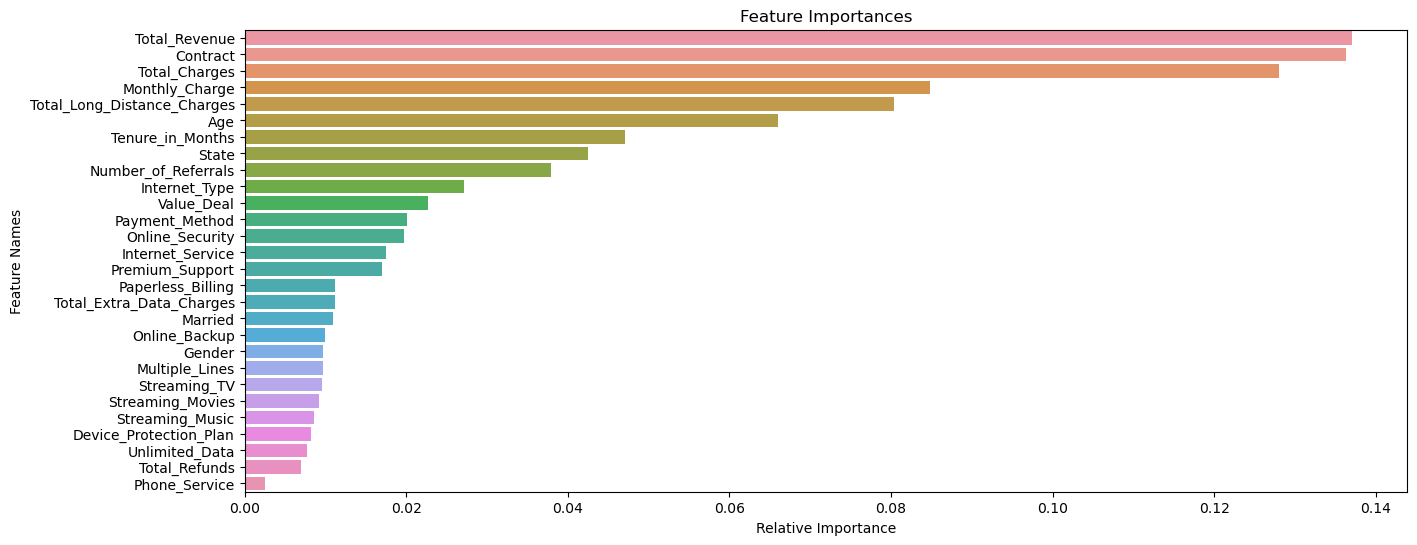

In [30]:
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1] # sort the importance 

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()



# Use Model for Prediction on New Data


In [31]:
# Define the path to the Joiner Data Excel file
file_path = r"C:/Users/mosta/OneDrive/Desktop/Ds 2023/Project Data Science 30.09.2024 to 1.11.2024/Churn Analysis Portfolio Project/Prediction_Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_JoinData'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)


In [32]:
# Display the first few rows of the fetched data
print(new_data.head())

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   18829-TAM  Female   49     Yes   Tamil Nadu                    4   
1   22765-MAH  Female   40     Yes  Maharashtra                    6   
2   22782-ODI  Female   50     Yes       Odisha                    2   
3   26412-ASS  Female   30      No        Assam                    7   
4   26448-BIH  Female   57      No        Bihar                   10   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines Internet_Service  \
0                31     Deal 5           Yes             No               No   
1                16     Deal 5           Yes             No               No   
2                28       None           Yes             No               No   
3                18       None           Yes             No               No   
4                21     Deal 5           Yes             No              Yes   

  Internet_Type Online_Security Online_Backup Device_Protection_Plan  \
0          Non

In [33]:
pd.set_option('display.max_columns', None)
new_data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,18829-TAM,Female,49,Yes,Tamil Nadu,4,31,Deal 5,Yes,No,No,None,No,No,No,No,No,No,No,No,Month-to-Month,No,Credit Card,18.80,56.00,0.0,0,19.83,75.83,Joined,Others,Others
1,22765-MAH,Female,40,Yes,Maharashtra,6,16,Deal 5,Yes,No,No,None,No,No,No,No,No,No,No,No,Month-to-Month,No,Bank Withdrawal,19.45,19.45,0.0,0,16.44,35.89,Joined,Others,Others
2,22782-ODI,Female,50,Yes,Odisha,2,28,None,Yes,No,No,None,No,No,No,No,No,No,No,No,Month-to-Month,No,Credit Card,19.30,54.70,0.0,0,30.39,85.09,Joined,Others,Others
3,26412-ASS,Female,30,No,Assam,7,18,None,Yes,No,No,None,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,20.70,39.85,0.0,0,27.78,67.63,Joined,Others,Others
4,26448-BIH,Female,57,No,Bihar,10,21,Deal 5,Yes,No,Yes,DSL,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,75.30,244.10,0.0,0,116.97,361.07,Joined,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,87077-TAM,Male,62,Yes,Tamil Nadu,3,21,Deal 5,Yes,No,Yes,Cable,No,No,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,No,Credit Card,69.00,147.80,0.0,0,54.82,202.62,Joined,Others,Others
407,95594-TAM,Female,64,No,Tamil Nadu,4,1,None,Yes,No,Yes,DSL,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,44.00,44.00,0.0,0,15.66,59.66,Joined,Others,Others
408,95735-PUN,Female,53,No,Punjab,10,21,None,Yes,No,No,None,No,No,No,No,No,No,No,No,Month-to-Month,No,Credit Card,19.25,48.35,0.0,0,42.36,90.71,Joined,Others,Others
409,95748-UTT,Male,22,Yes,Uttar Pradesh,5,4,Deal 5,Yes,Yes,No,None,No,No,No,No,No,No,No,No,Month-to-Month,No,Mailed Check,25.40,25.40,0.0,0,32.73,58.13,Joined,Others,Others


In [34]:
# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

In [35]:
# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

In [36]:
# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

In [37]:
# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Export Prediction file to CVS

In [38]:
# Save the results
original_data.to_csv(r"C:/Users/mosta/OneDrive/Desktop/Ds 2023/Project Data Science 30.09.2024 to 1.11.2024/Churn Analysis Portfolio Project/Prediction_Data.csv", index=False)